In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import folium

In [2]:
GOOGLE_DRIVE_BASE_PATH = "/content/drive/MyDrive/"
user = "Matthew" # change before running the notebook

if user == "Julia":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Matthew":
    DATA_PATH = "/Users/mdong/dataScience/projects-ml/ca-waste/" + "data/"
#     DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "Sustainability/ER131-Project/" + "data/"
elif user == "Samadi":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Shaye":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
    
print("User: {}\nPath to data: {}".format(user, DATA_PATH))

User: Matthew
Path to data: /Users/mdong/dataScience/projects-ml/ca-waste/data/


## Load data

In [3]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")
complete_feature_df.head()

Year  Waste Produced (Tons)     County  Population  \
0  2000.0             1676429.25    Alameda   1443939.0   
1  2000.0                 745.00     Alpine      1208.0   
2  2000.0               41059.90     Amador     35100.0   
3  2000.0              203896.87      Butte    203171.0   
4  2000.0               34110.44  Calaveras     40554.0   

   Electricity Usage (GWh)  
0              2926.106226  
1                 6.247035  
2               127.238094  
3               705.766172  
4               173.578409

In [35]:
complete_feature_df["Log Waste Produced"] = np.log10(complete_feature_df["Waste Produced (Tons)"])
complete_feature_df.head()

Year  Waste Produced (Tons)     County  Population  \
0  2000.0             1676429.25    Alameda   1443939.0   
1  2000.0                 745.00     Alpine      1208.0   
2  2000.0               41059.90     Amador     35100.0   
3  2000.0              203896.87      Butte    203171.0   
4  2000.0               34110.44  Calaveras     40554.0   

   Electricity Usage (GWh)  Log Waste Produced  
0              2926.106226            6.224385  
1                 6.247035            2.872156  
2               127.238094            4.613418  
3               705.766172            5.309411  
4               173.578409            4.532887

### Waste Generated over Time 

In [24]:
counties_list = complete_feature_df.County.unique()
counties_list

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura',
       'Yolo', 'Yuba'], dtype=object)

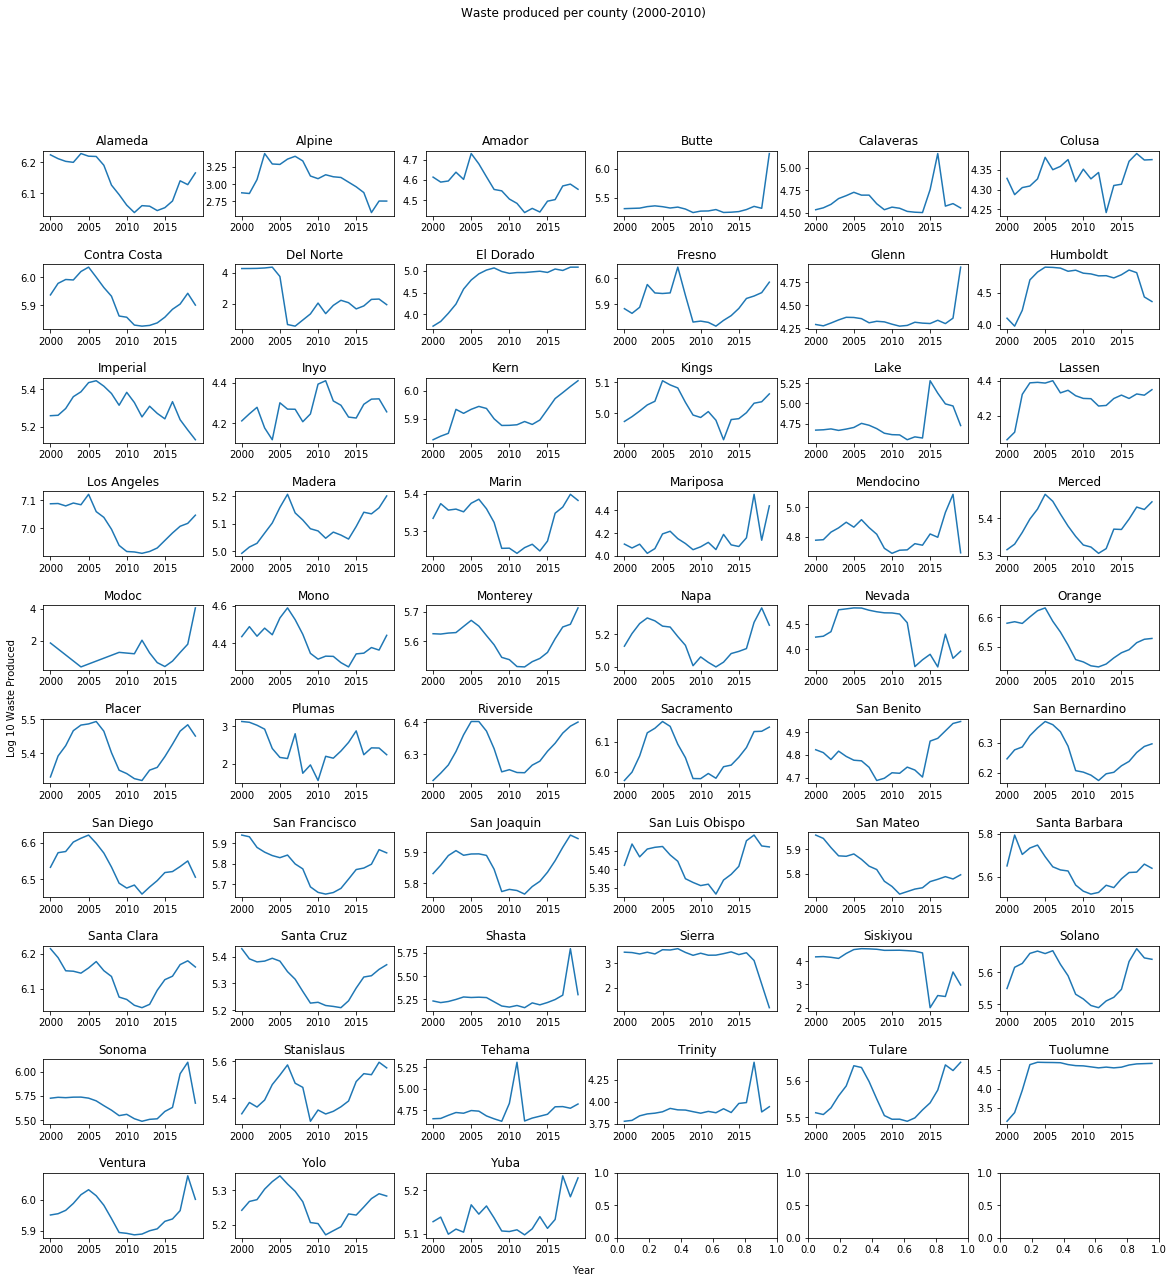

In [45]:
fig, axs = plt.subplots(10, 6, figsize=(20,20), sharex=False, sharey=False)

county_idx=0
for ax in axs.ravel():
    if county_idx < len(counties_list):
        county = counties_list[county_idx]
        county_df = complete_feature_df[complete_feature_df.County == county]
        ax.plot(county_df["Year"], county_df["Log Waste Produced"])
        ax.set_title("{}".format(county))
        county_idx+=1

fig.suptitle("Waste produced per county (2000-2019)")
fig.text(0.1, 0.5, 'Log 10 Waste Produced', va='center', rotation='vertical')
fig.text(0.5, 0.1, 'Year', ha='center')
plt.subplots_adjust(hspace=.75)

In [4]:
fig = px.line(complete_feature_df, x="Year", y="Waste Produced (Tons)", color='County')
fig.show()

## Waste vs other features

In [22]:
average_data_per_county = complete_feature_df.groupby("County").agg(np.mean)
average_data_per_county.reset_index(inplace=True)
average_data_per_county.head()

County    Year  Waste Produced (Tons)  Population  \
0    Alameda  2009.5           1.388987e+06  1531802.10   
1     Alpine  2009.5           1.337510e+03     1197.40   
2     Amador  2009.5           3.680986e+04    36917.45   
3      Butte  2009.5           2.817851e+05   217257.10   
4  Calaveras  2009.5           4.551152e+04    44453.00   

   Electricity Usage (GWh)  
0              2958.846113  
1                 9.547645  
2               136.560188  
3               703.726358  
4               193.629777

### Average waste vs energy & population

In [23]:
fig = px.scatter(average_data_per_county, x="Electricity Usage (GWh)", y="Waste Produced (Tons)",
                 size="Population", hover_data=["County"], color="County",
#                  log_x=True, log_y=True, 
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Electricity Usage (GWh)": "Average Electricity Usage (gWh)",
                     "Population": "Average Population"
                 },
                 title="Average Yearly CA County Waste vs Electricity Usage & Population (2000-2019)"
                )
fig.show()

### Geospatial visualization of waste by county

In [19]:
GEOSPATIAL_DATA_PATH = DATA_PATH + "geospatial-data/"
ca_counties_geojson_path = GEOSPATIAL_DATA_PATH + "ca-counties.geojson"

complete_feature_df_2019 = complete_feature_df[complete_feature_df.Year == 2019]
complete_feature_df_2019["Waste Produced"] = np.log(complete_feature_df_2019["Waste Produced (Tons)"])
complete_feature_df_2019.head()

waste_heat_map = folium.Map(location=(37.5, -119.5), zoom_start=6, min_zoom=5, tiles='cartodbpositron')

folium.Choropleth(
    geo_data=ca_counties_geojson_path,
    data=complete_feature_df_2019,
    columns=['County', 'Waste Produced'],
    key_on='feature.id',
    fill_color='BuPu',
    legend_name='Waste Produced (Log Tons)'
).add_to(waste_heat_map)

waste_heat_map

/Users/mdong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

